# Student Performance Analysis

Complete EDA and classification on Students data set from kaggle.com followed by a Logistic Regression,  Random Forest Classifier and Decision Tree Classifier model. Data set had 1000 rows and 8 columns. In the project i have started with exploring the data, looking for number of rows and features, followed by data cleaning, getting inferential stats of the data, finding correaltion between the features of the data, visualizing the different aspects of the data to f=draw certain insights and give comments about the data and story behind it. Finally after all preprocessing, and visualization, I created the logistic regression model to predict the marks of a student depending upon the given values and data of the independent features and visualized the confusion matrix for the same.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

### Loading and exploring Data

In [2]:
os.chdir('D:\My PC\Career Shine\Python\Projects\Logistic Regression\Student Performance Analysis')
#loading data into python
Data = pd.read_csv('StudentsPerformance.csv')

In [3]:
#Displaying First 5 rows of our data
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Displaying last 5 rows of our data
Data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
#This shows us that our data has total of 1000 rows
#Checking the shape of our data

Data.shape

(1000, 8)

### Descriptive Statistics of Data

In [6]:
#Descriptive statistics of our data

Data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Our data has integer values in only three columns and thus we have got the descriptive statistics of those three columns only.
The descriptive statistics shows us the maximum and the minumum scores of the students in each subject. This is a good insight for now.


In [7]:
#Exploring the Data

Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
#Checking unique value count per column

Data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
#checking unique values per column

a = Data['race/ethnicity'].unique()
print(a)

b = Data['gender'].unique()
print(b)

c = Data['parental level of education'].unique()
print(c)

d = Data['lunch'].unique()
print(d)

e = Data['test preparation course'].unique()
print(e)

['group B' 'group C' 'group A' 'group D' 'group E']
['female' 'male']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


### Cleaning Data

In [10]:
#Cleaning the database
#Check for the null values

Data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Thus, our data have no missing values, which is a great sign. Otherwise, if we have found any missing values,
we would have treated them well either by dropping the rows or by adding relevent values to the cells.

Now, our next step is to check for correlation between the variables of out data set, and as per my view, I think all the variables are important for out model, as they somhow affect the other values such as *marks of the student* is affected by *parental level of education*, and so on.

### Inferential Statistics Of Data

In [11]:
#taking 100 random samples from our data
sample_math_marks = np.random.choice(a = Data['math score'] , size = 100)

#getting the sample mean
print('Sample mean for Math Score : ' , sample_math_marks.mean())

#printing population mean
print('Population mean for Math Score : ' , Data['math score'].mean())

#taking 100 random samples from our data
sample_reading_marks = np.random.choice(a = Data['reading score'] , size = 100)

#getting the sample mean
print('Sample mean for Reading Score : ' , sample_reading_marks.mean())

#printing population mean
print('Population mean for Reading Score : ' , Data['reading score'].mean())

#taking 100 random samples from our data
sample_writing_marks = np.random.choice(a = Data['writing score'] , size = 100)

#getting the sample mean
print('Sample mean for Writing Score : ' , sample_writing_marks.mean())

#printing population mean
print('Population mean for Writing Score : ',  Data['writing score'].mean())

Sample mean for Math Score :  67.38
Population mean for Math Score :  66.089
Sample mean for Reading Score :  67.91
Population mean for Reading Score :  69.169
Sample mean for Writing Score :  68.74
Population mean for Writing Score :  68.054


From this analysis and also comparing the graphs we have got, we can say that he mean score of the class population is between 65 - 70. 

### Correlationship Analysis

Now, this analysis will tell us if any of the variables are correlated with some other or not. If there is some correlation between any of the variables, we have to deal with the correlated variables so that they won't create any issue in further modelling of our data.

In [12]:
correlation = Data.corr()
correlation

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


The table above gives us the values by which our subject scores are correlated to each other. We can also visualize it as a heast map as follows.

<AxesSubplot:>

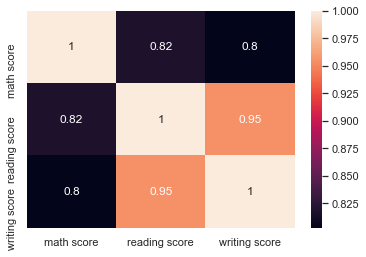

In [13]:
sb.heatmap(correlation , xticklabels = correlation.columns , yticklabels = correlation.columns , annot = True)

After visualizing the data as heatmap we get that the correlation is not palying much role in manipulating our data or driving it in any perticular direction which might harm our model. One reason for this may be that our data have a lots of string values. Let's see what we get in our further analysis.

### Grouping the Data

In [14]:
#Number of Girl Students Scoring 90 in all the Subjects

Data[(Data['gender'] == 'female')  & (Data['math score'] > 90) & (Data['reading score'] > 90) & (Data['writing score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


In [15]:
#Number of Boy Students Scoring 90 in all the Subjects

Data[(Data['gender'] == 'male')  & (Data['math score'] > 90) & (Data['reading score'] > 90) & (Data['writing score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
571,male,group A,bachelor's degree,standard,none,91,96,92
625,male,group D,some college,standard,completed,100,97,99
864,male,group C,associate's degree,standard,none,97,93,91
916,male,group E,bachelor's degree,standard,completed,100,100,100
919,male,group B,some college,standard,completed,91,96,91


In [16]:
# Checking and comparing the scores of boys and girls

Gender_comparision= Data.groupby(['gender']).agg(['min' , 'median' , 'max'])
Gender_comparision

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [17]:
# Effect of lunch on the score of students

Lunch_effect = Data[['lunch' , 'gender' , 'math score' , 'reading score' , 'writing score']].groupby(['lunch' , 'gender']).agg('median')
Lunch_effect

math score  reading score  writing score
lunch        gender                                          
free/reduced female        57.0           67.0           68.0
             male          62.0           61.0           59.0
standard     female        67.0           75.0           76.0
             male          72.0           67.5           67.0

In [18]:
# Effect of test preperation on students performance

Data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

### Data Visualization

In [19]:
data = Data.copy()

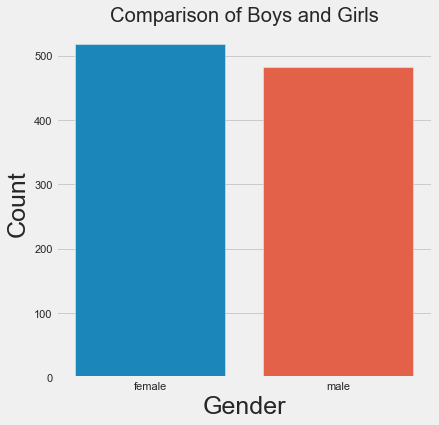

In [80]:
# Visualizing no. of boys and girls

plt.rcParams['figure.figsize'] = (6, 6)
plt.style.use('fivethirtyeight')

sb.countplot(data['gender'])
plt.title('Comparison of Boys and Girls', fontweight = 27)
plt.xlabel('Gender' ,  fontsize = 25)
plt.ylabel('Count' ,  fontsize = 25)
plt.show()

In [103]:
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,pass_math,pass_reading,pass_writing,Pass/Fail,percentage,status,grades
0,0,2,1,1,1,72,72,74,218,Pass,Pass,Pass,Pass,72.666667,1,B
1,0,3,4,1,0,69,90,88,247,Pass,Pass,Pass,Pass,82.333333,1,A
2,0,2,3,1,1,90,95,93,278,Pass,Pass,Pass,Pass,92.666667,1,O
3,1,1,0,0,1,47,57,44,148,Pass,Pass,Pass,Pass,49.333333,1,D
4,1,3,4,1,1,76,78,75,229,Pass,Pass,Pass,Pass,76.333333,1,B


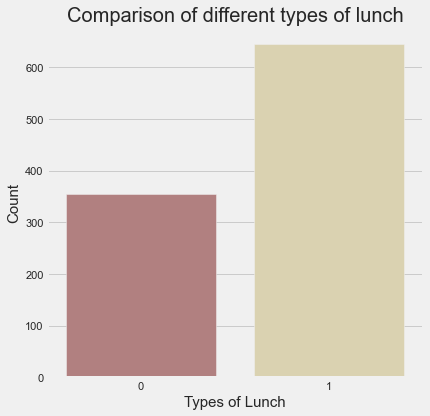

In [75]:
# Visualizing different types of lunch

plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')


sb.countplot(Data['lunch'] , palette = 'pink')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of Lunch' , fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

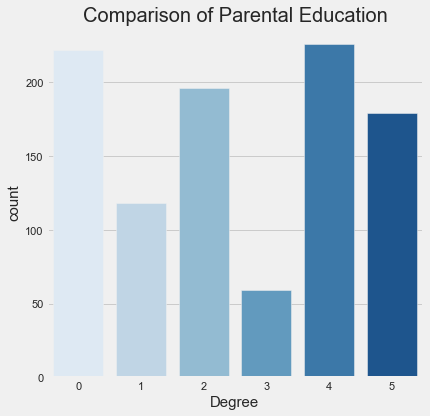

In [76]:
# Visualizing differnt parental education

plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(Data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree' , fontsize = 15)
plt.ylabel('count' , fontsize = 15)
plt.show()

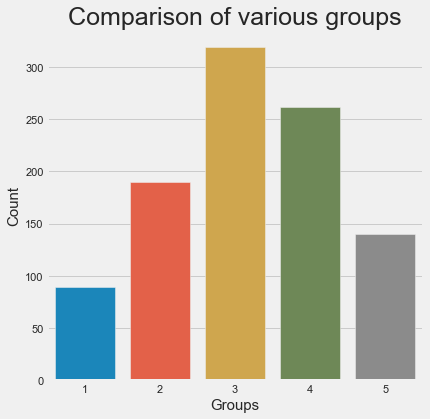

In [83]:
# Visualizing different groups in our Data Set

plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')


sb.countplot(Data['race/ethnicity'])
plt.title('Comparison of various groups', fontweight = 35, fontsize = 25)
plt.xlabel('Groups' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)
plt.show()

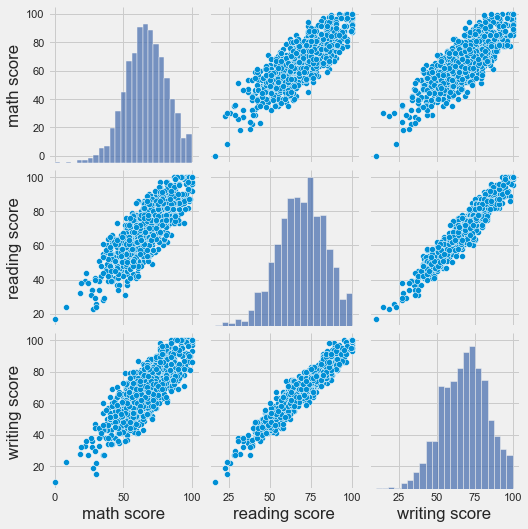

In [24]:
#visualizing data variables against each other

sb.pairplot(Data)

The pair plot visualization shows us that all the variables i.e the marks in one subject compared to the marks in other subjects the relation is linearly increasing. This does not give us much of an insight but this much is also good. Let's see what we get in our further analysis.

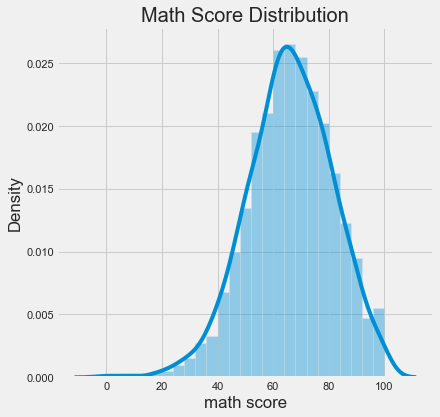

In [84]:
#Data Visualization using matplotlib


sb.distplot(Data['math score'])
plt.title('Math Score Distribution' , fontsize = 20)
plt.show()

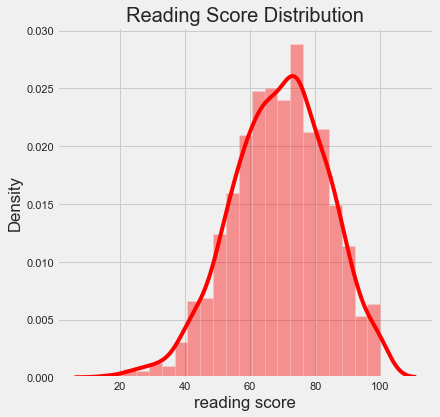

In [85]:
sb.distplot(Data['reading score'] , color = 'red')
plt.title('Reading Score Distribution' , fontsize = 20)
plt.show()

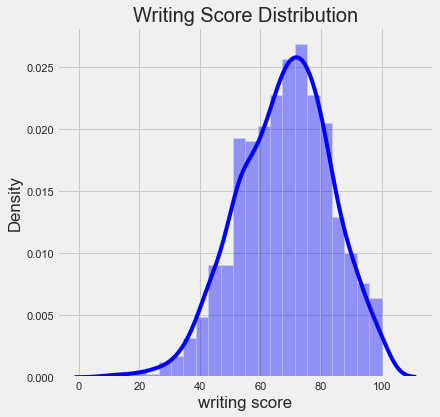

In [86]:
sb.distplot(Data['writing score'] , color = 'blue')
plt.title('Writing Score Distribution' , fontsize = 20)
plt.show()

This shows that the scores have some outliers on left side creating a left skew in all the three graphs. These must be students performing badly in there exams. We'll get some more clear insights in our further analysis.


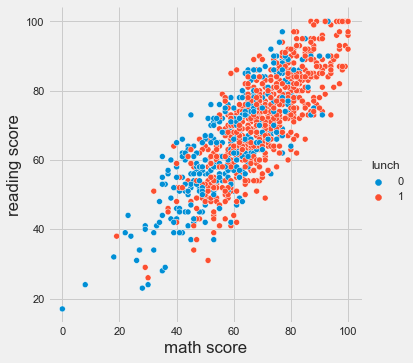

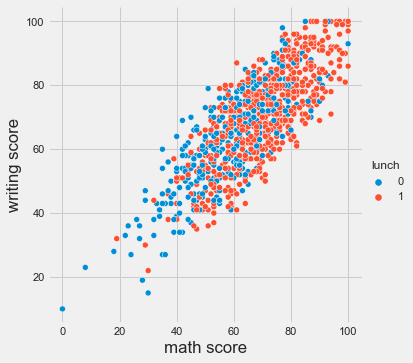

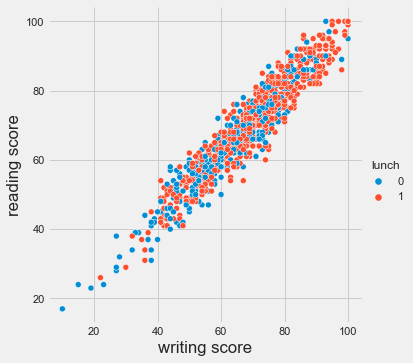

In [87]:
#analysing the relation between scores of two subject bifurgated on the basis of lunch.

sb.relplot(x = 'math score' , y = 'reading score' , hue = 'lunch' , data = Data)

sb.relplot(x = 'math score' , y = 'writing score' , hue = 'lunch' , data = Data)

sb.relplot(x = 'writing score' , y = 'reading score' , hue = 'lunch' , data = Data)

Analysing these graphs we can say that when we compare reading and writing scores with each other, there is not much diversity in the scores of students having free lunch vs students having standard lunch, and this can be seen in all the three graphs.
This gives us a good insight of the impact of free or standard lunch on the scores of the students.

Good Job!!

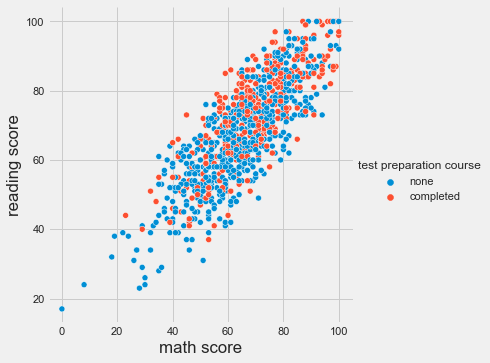

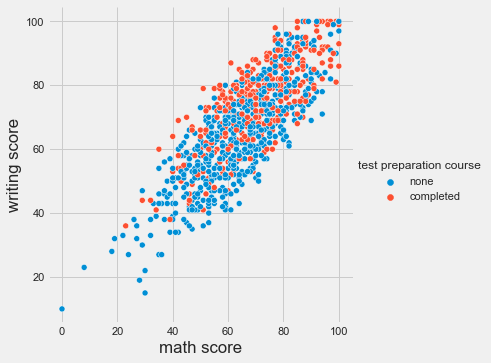

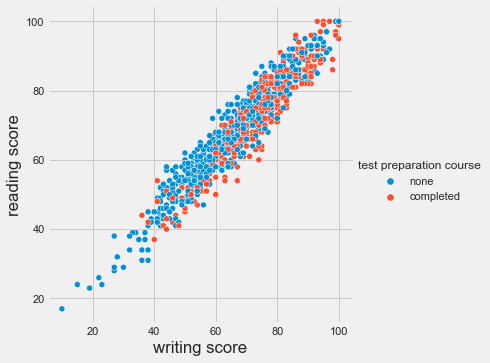

In [29]:
#analysing the relation between scores of two subject bifurgated on the basis of test preperation.

sb.relplot(x = 'math score' , y = 'reading score' , hue = 'test preparation course' , data = Data)

sb.relplot(x = 'math score' , y = 'writing score' , hue = 'test preparation course' , data = Data)

sb.relplot(x = 'writing score' , y = 'reading score' , hue = 'test preparation course' , data = Data)

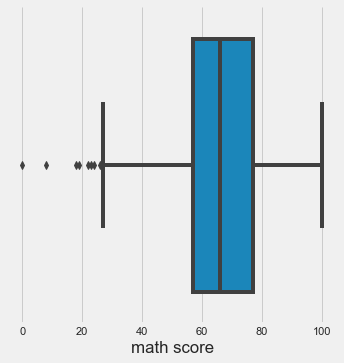

In [88]:
#Checking for outliers 
sb.catplot(x = 'math score' , kind = 'box' , data = Data)

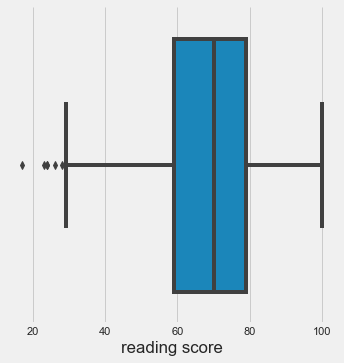

In [31]:
sb.catplot(x = 'reading score' , kind = 'box' , data = Data)

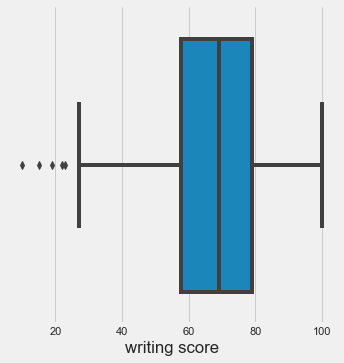

In [32]:
sb.catplot(x = 'writing score' , kind = 'box' , data = Data)

From these graphs we get a fair idea of the outliers in all three subjects. And, this is a good insight.
Great Job!!

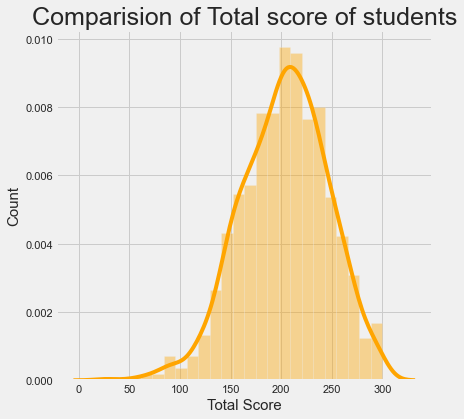

In [97]:
# Plotting the comparision of students passed and failed the examination

Data['Total Score'] = Data['math score'] + Data['reading score'] + Data['writing score']

sb.distplot(Data['Total Score'] , color = 'orange')

plt.title('Comparision of Total score of students' , fontsize = 25)
plt.xlabel('Total Score' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)
plt.show()

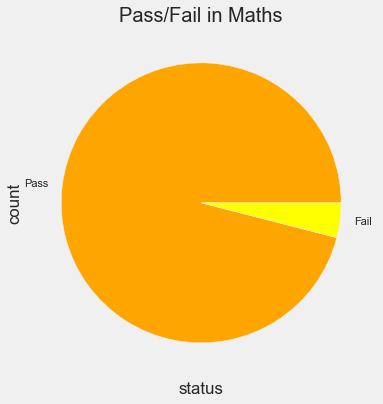

In [90]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
Data['pass_math'] = np.where(Data['math score']< passmarks, 'Fail', 'Pass')
Data['pass_math'].value_counts().plot.pie(colors = ['orange', 'yellow'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

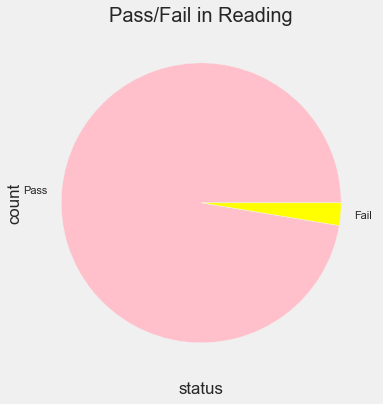

In [91]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

Data['pass_reading'] = np.where(Data['reading score']< passmarks, 'Fail', 'Pass')
Data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

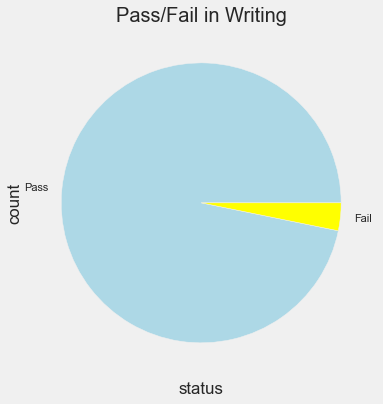

In [92]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

Data['pass_writing'] = np.where(Data['writing score']< passmarks, 'Fail', 'Pass')
Data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['lightblue', 'yellow'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

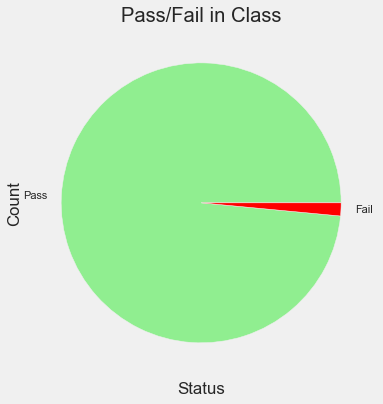

In [93]:
# pie chart

Data['Pass/Fail'] = np.where(Data['Total Score'] < 100 , 'Fail' , 'Pass')
Data['Pass/Fail'].value_counts(dropna = False).plot.pie(colors = ['lightgreen', 'red'])

plt.title('Pass/Fail in Class')
plt.ylabel('Count')
plt.xlabel('Status')
plt.show()


In [38]:
Data['Total Score'] = Data['math score'] + Data['reading score'] + Data['writing score']
Data['percentage'] = Data['Total Score']/3

In [39]:
Data['pass_math'] = np.where(Data['math score']< passmarks, 'Fail', 'Pass')
Data['status'] = Data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

In [40]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

Data['grades'] = Data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

Data['grades'].value_counts()

B    261
C    256
D    234
A    146
O     52
E     51
Name: grades, dtype: int64

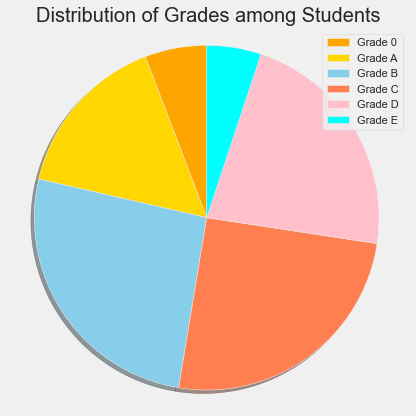

In [94]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['orange', 'gold', 'skyblue', 'coral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

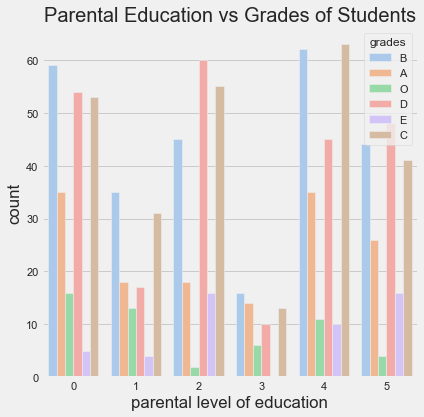

In [101]:
# for better visualization we will plot it again using seaborn

sb.countplot(x = Data['parental level of education'], data = Data, hue = Data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

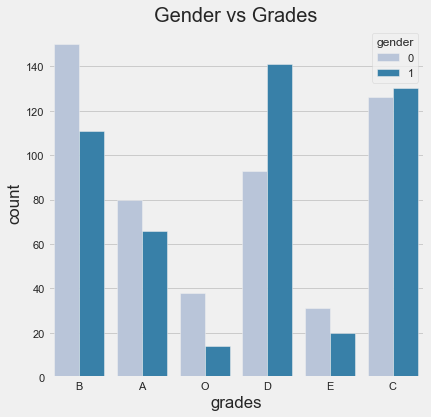

In [96]:
# comparing the distribution of grades among males and females

sb.countplot(x = Data['grades'], data = Data, hue = Data['gender'], palette = 'PuBu')
plt.title('Gender vs Grades', fontweight = 30, fontsize = 20)
plt.show()

### Converting catogical variables into numerical variables

In [44]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
Data['test preparation course'] = le.fit_transform(Data['test preparation course'])

# label encoding for lunch
Data['lunch'] = le.fit_transform(Data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
Data['race/ethnicity'] = Data['race/ethnicity'].replace('group A', 1)
Data['race/ethnicity'] = Data['race/ethnicity'].replace('group B', 2)
Data['race/ethnicity'] = Data['race/ethnicity'].replace('group C', 3)
Data['race/ethnicity'] = Data['race/ethnicity'].replace('group D', 4)
Data['race/ethnicity'] = Data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
Data['parental level of education'] = le.fit_transform(Data['parental level of education'])

#label encoding for gender
Data['gender'] = le.fit_transform(Data['gender'])

# label encoding for pass_math
Data['pass_math'] = le.fit_transform(Data['pass_math'])

# label encoding for pass_reading
Data['pass_reading'] = le.fit_transform(Data['pass_reading'])

# label encoding for pass_writing
Data['pass_writing'] = le.fit_transform(Data['pass_writing'])

# label encoding for status
Data['status'] = le.fit_transform(Data['status'])

# label encoding for Pass
Data['Pass/Fail'] = Data['Pass/Fail'].replace('Pass', 1)
Data['Pass/Fail'] = Data['Pass/Fail'].replace('Fail', 0)

In [45]:
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,pass_math,pass_reading,pass_writing,Pass/Fail,percentage,status,grades
0,0,2,1,1,1,72,72,74,218,1,1,1,1,72.666667,1,B
1,0,3,4,1,0,69,90,88,247,1,1,1,1,82.333333,1,A
2,0,2,3,1,1,90,95,93,278,1,1,1,1,92.666667,1,O
3,1,1,0,0,1,47,57,44,148,1,1,1,1,49.333333,1,D
4,1,3,4,1,1,76,78,75,229,1,1,1,1,76.333333,1,B


In [46]:
Data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,pass_math,pass_reading,pass_writing,Pass/Fail,percentage,status,grades
995,0,5,3,1,0,88,99,95,282,1,1,1,1,94.000000,1,O
996,1,3,2,0,1,62,55,55,172,1,1,1,1,57.333333,1,D
997,0,3,2,0,0,59,71,65,195,1,1,1,1,65.000000,1,C
998,0,4,4,1,0,68,78,77,223,1,1,1,1,74.333333,1,B
999,0,4,4,0,1,77,86,86,249,1,1,1,1,83.000000,1,A


### Data Preperation

In [47]:
# splitting the inputs and output variables

x = Data.iloc[:,:14]
y = Data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [48]:
# splitting into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 365)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [49]:
# Scaling the data to make it more model fit in order to avoid errors due to unordered data

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## Modelling

## Model 1: Logistic Regression

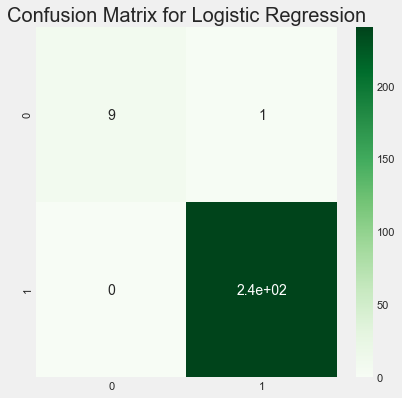

Training Accuracy : 0.996
Testing Accuracy : 0.996

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00       240

    accuracy                           1.00       250
   macro avg       1.00      0.95      0.97       250
weighted avg       1.00      1.00      1.00       250


Area Under Curve : 
 0.9500000000000001


In [71]:
from math import * 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# printing the confusion matrix
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()


# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

CR_RF = classification_report(y_test,y_pred)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, y_pred)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

# Printing the results
for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

## Model 2: Random Forest

In [52]:
from sklearn.tree import DecisionTreeClassifier       # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier   # Random forest tree algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

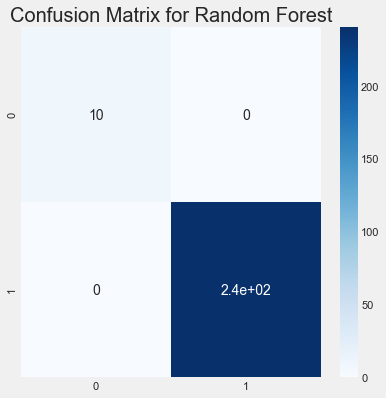


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       240

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


Area Under Curve : 
 1.0


In [67]:
# Training the model
parametersRF = {'n_estimators':15,'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(x_train, y_train)
 
# Predicting on test dataset
predictionsRF = RF.predict(x_test)
 
     
# Evaluating model
cm = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

# printing the confusion matrix
from sklearn.metrics import confusion_matrix


# printing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()


resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

# Printing the results

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

## Model 3: Decision Tree Classifier

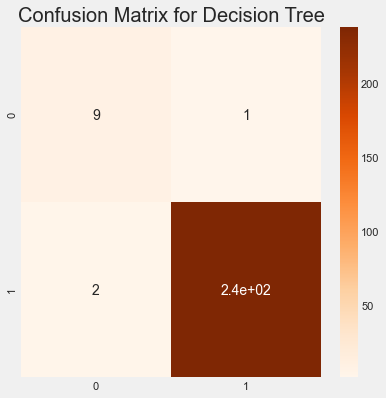


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.99      0.99       240

    accuracy                           0.99       250
   macro avg       0.91      0.95      0.93       250
weighted avg       0.99      0.99      0.99       250


Area Under Curve : 
 0.9458333333333333


In [68]:
# Training the model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(x_train, y_train)
 
# Predicting on test dataset
predictionsDT = DT.predict(x_test)
 
     
# Evaluating model
CM = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(CM, annot = True, cmap = "Oranges")
plt.title('Confusion Matrix for Decision Tree', fontweight = 30, fontsize = 20)
plt.show()


resultsDT = {"\nClassification Report":CR_DT,"\nArea Under Curve":AUC_DT}

# Printing the results

for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

## Conclusion

From the analysis we can draw some colclusions which can be stated as below

1. The number of boys and girls in a class are slightly different, number of girls are around 8% more than the number of boys in the class.
2. Around 97% of the class has passed the exam.
3. Students performance is linealy dependent on the type of lunch they take.
4. The mean score of the class in all three sucjects are around 65 - 70. 
5. We can observe some outliers in the class from the distribution of scores, they might be students with bad academic background.
6. Around 1.3% of boys population has scored more than 90% in all subjects.
7. Around 3.5% of girls population has scored more than 90% in all three subjects.